In [1]:
# Loading important Libraries.....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# .....................Importing Important libraries for Classification Models................
# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Ensemble Techniques...
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Model selection libraries...
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file....
df=pd.read_csv('CensusIncome.csv',names=['age','workclass','fnlwgt','education','education-num','marital-status',
                                         'occupation','relationship','race','sex','capital-gain','capital-loss',
                                         'hours-per-week','native-country','Salary'])
df
# Feature Names were not there in the Dataset so i put the Feature names along with reading process to make DataFrame 
#  easier in reading.......

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Understanding Data:               

1) Features/Attributes:(14)                                        
   >> 1) age: continuous.                                       
   >> 2) workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.    
   >> 3) fnlwgt: continuous.                                     
   >> 4) education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters,            1st-4th, 10th, Doctorate, 5th-6th, Preschool.                     
   >> 5) education-num: continuous.                                 
   >> 6) marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-             spouse.                                                        
   >> 7) occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,               Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.    
   >> 8) relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.                    
   >> 9) race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.                                      
   >> 10) sex: Female, Male.                
   >> 11) capital-gain: continuous.                             
   >> 12) capital-loss: continuous.                         
   >> 13) hours-per-week: continuous.                                
   >> 14) native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India,             Japan,Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,               Ireland,France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland,           Thailand,Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.                                

2) Target/Labels:(1)                                               
   >> Salary :   ( Prediction task is to determine whether a person makes over 50K a year.)                       
                                 
3) We have to predict whether a person makes above than 50k a year, Data is categorical.                       

4) So from the above information i interpret that the salary will be predicted using Logistic Regression and Classification        Models                              

# EDA ( Exploratory Data Analysis)

In [3]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 32561 rows and 15 columns.
df.shape

(32561, 15)

In [4]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
# Checking the no. of different unique values present in the each Feature of the Dataset......
for i in df.columns.values:
    print('Number of unique values in {} are {} '.format(i,df[i].nunique()))

Number of unique values in age are 73 
Number of unique values in workclass are 9 
Number of unique values in fnlwgt are 21648 
Number of unique values in education are 16 
Number of unique values in education-num are 16 
Number of unique values in marital-status are 7 
Number of unique values in occupation are 15 
Number of unique values in relationship are 6 
Number of unique values in race are 5 
Number of unique values in sex are 2 
Number of unique values in capital-gain are 119 
Number of unique values in capital-loss are 92 
Number of unique values in hours-per-week are 94 
Number of unique values in native-country are 42 
Number of unique values in Salary are 2 


In [6]:
# checking the Features information regarding the dataset....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
Salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Features Information:                    
1) No null data.              
2) int datatype= 6                   
3) object datatype= 9               

##### There are 6 int type and 9 object type datatypes...

In [7]:
# Statistical Features Information......
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


######  Mean is little bit greater than the median thus we can say that data is little bit right skewed ,although it is very close to normal distribution.

In [8]:
# Checking the correlation.....
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


## Univariant Analysis 

age                  AxesSubplot(0.125,0.787927;0.168478x0.0920732)
fnlwgt            AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
education-num     AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
capital-gain      AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
capital-loss         AxesSubplot(0.125,0.677439;0.168478x0.0920732)
hours-per-week    AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
dtype: object

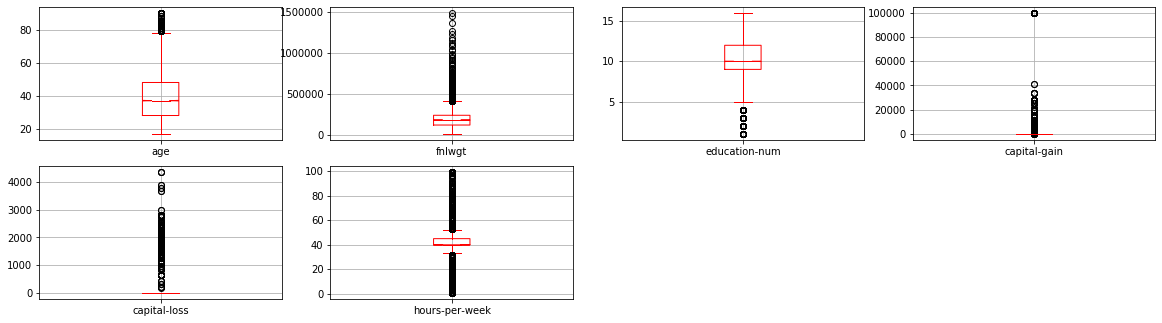

In [9]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(7,4),figsize=(20,20), grid=True, notch=True, color='red',legend=True)

##### Lots of outliers present.....

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D35656748>,
      dtype=object)

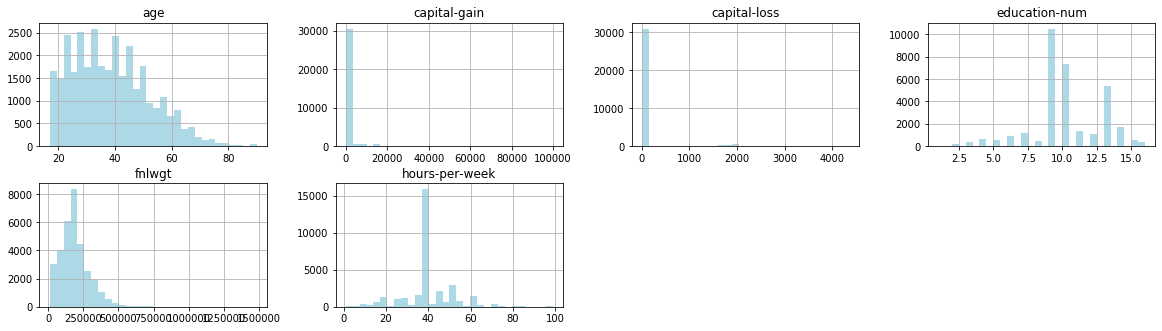

In [10]:
 #Checking the Distribution using the histogram plot.
df.hist(figsize=(20,20),grid=True,layout=(7,4),bins=30,color='lightblue') 

In [11]:
# Counting Number of persons having Salary below or more than 50K.......
df['Salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: Salary, dtype: int64

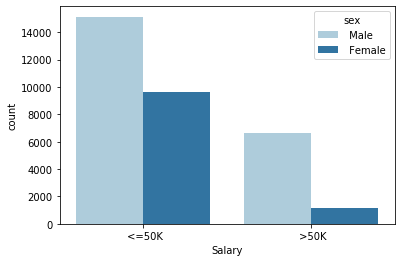

In [12]:
# Graph to see the Salary Counts.....
sns.countplot(x='Salary',data=df,hue='sex',palette='Paired')

##### Persons who gat salary <= 50K are more in number

## Bivariate Analysis

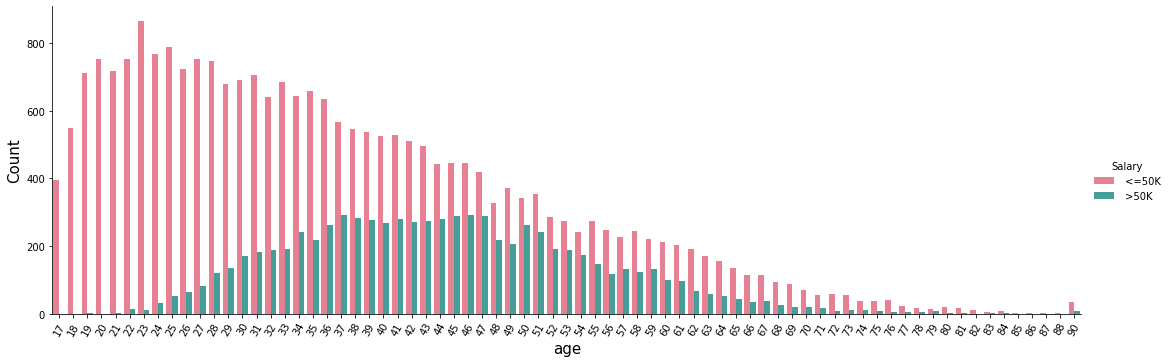

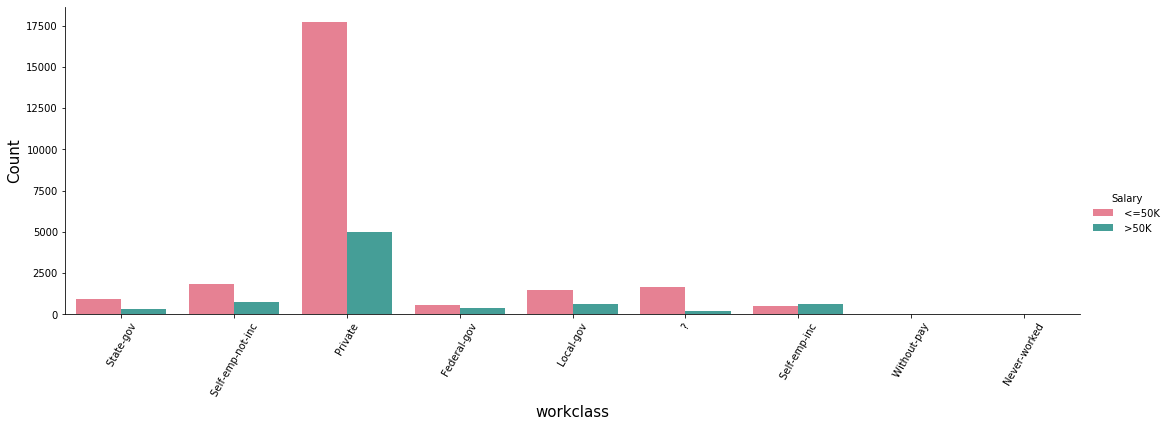

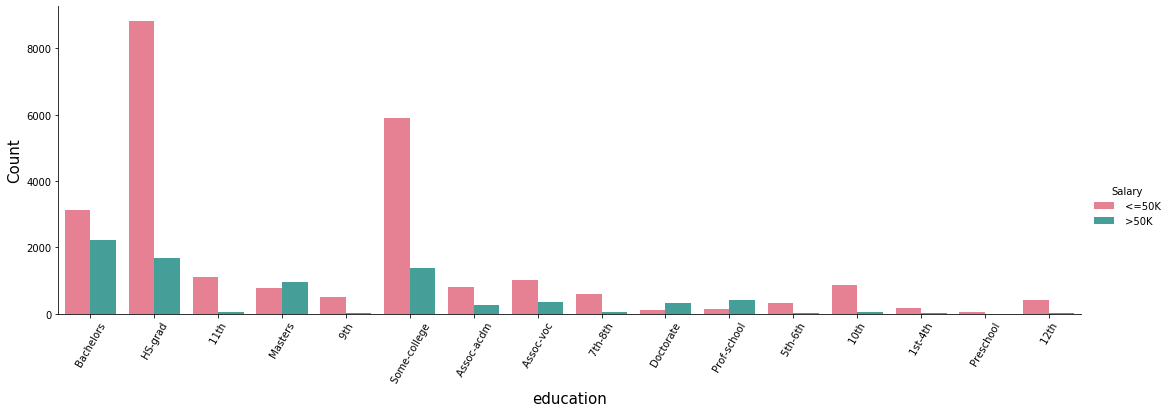

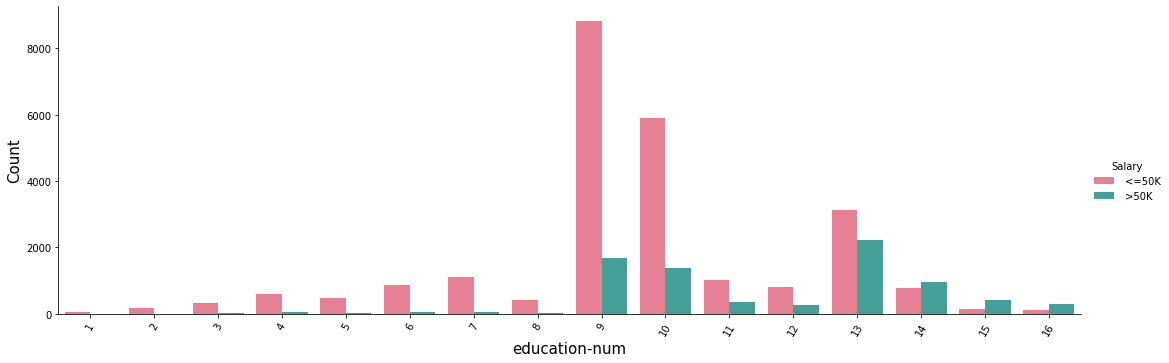

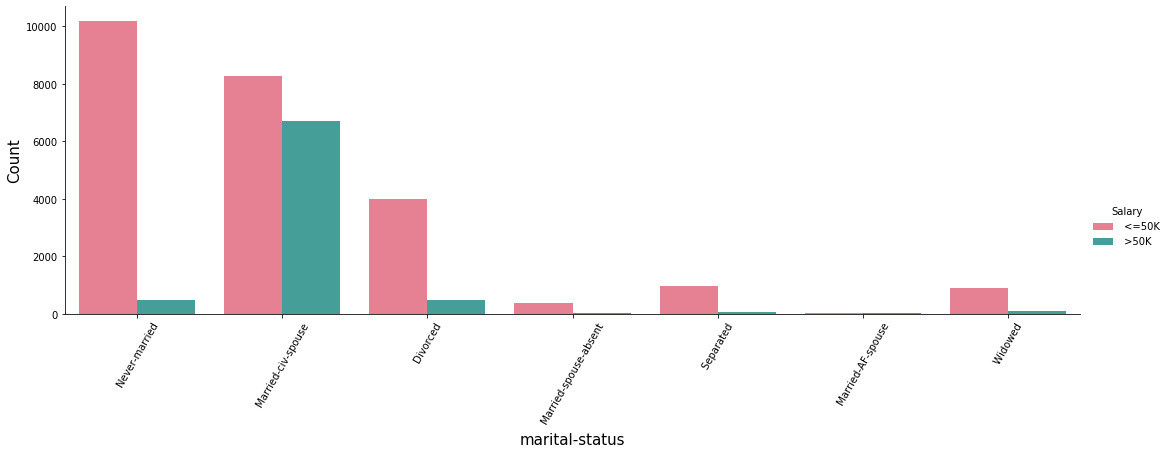

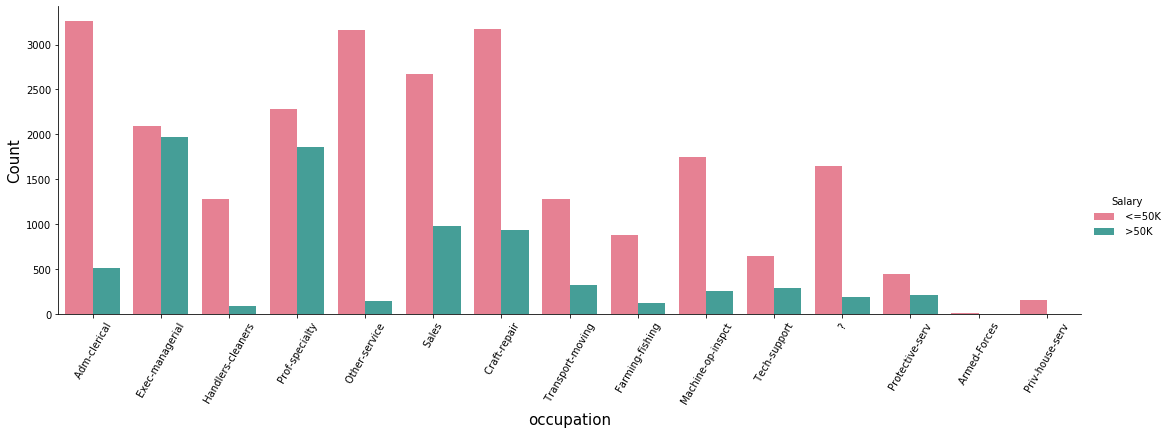

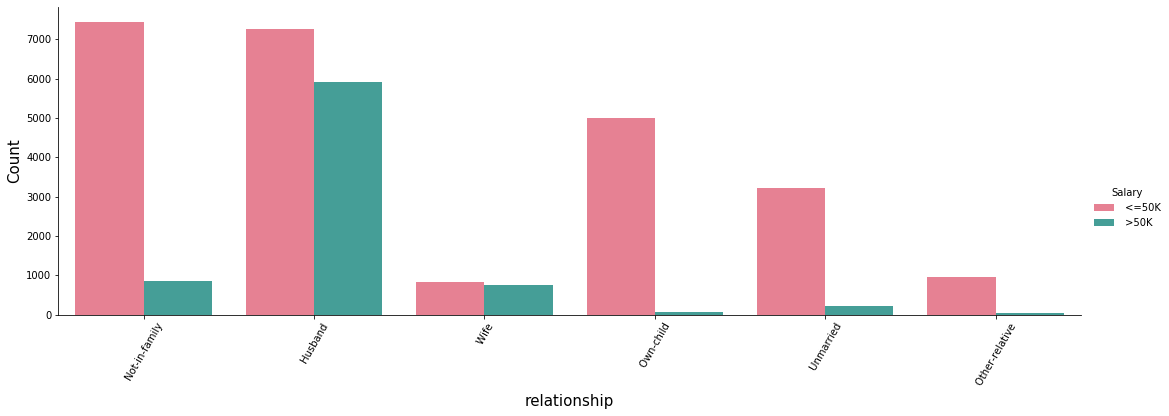

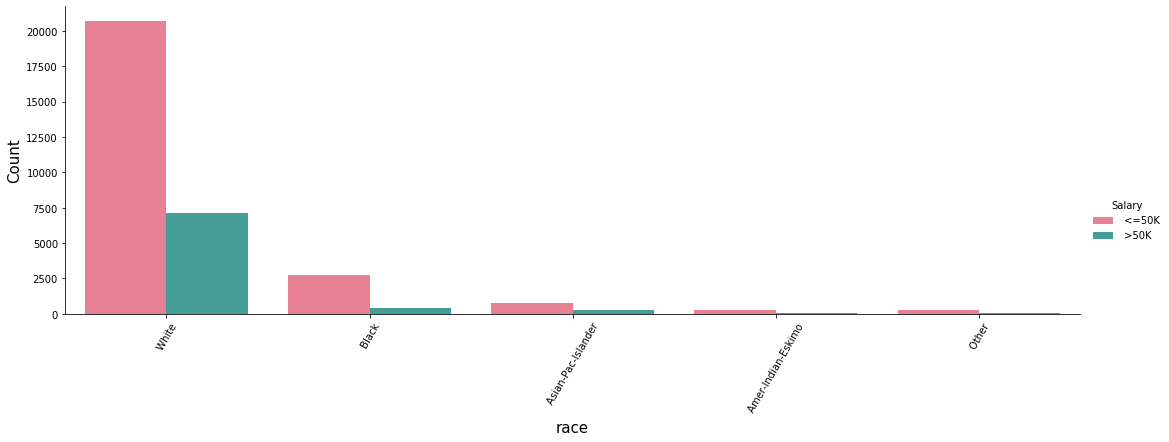

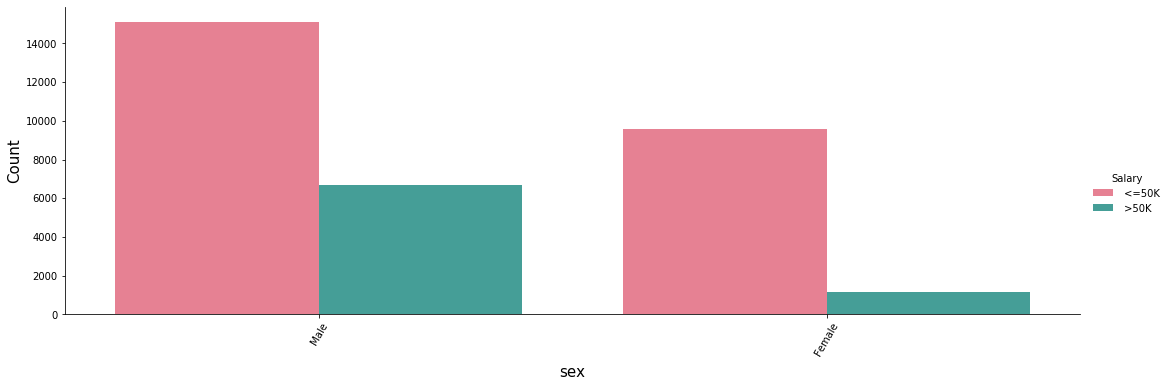

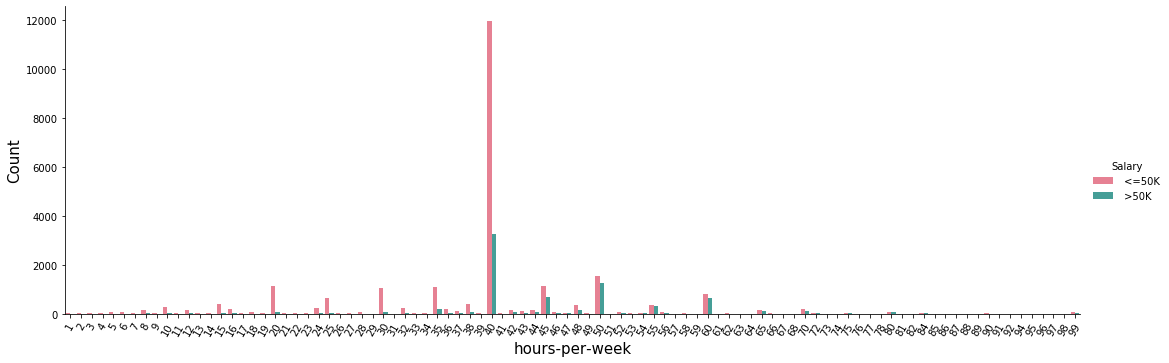

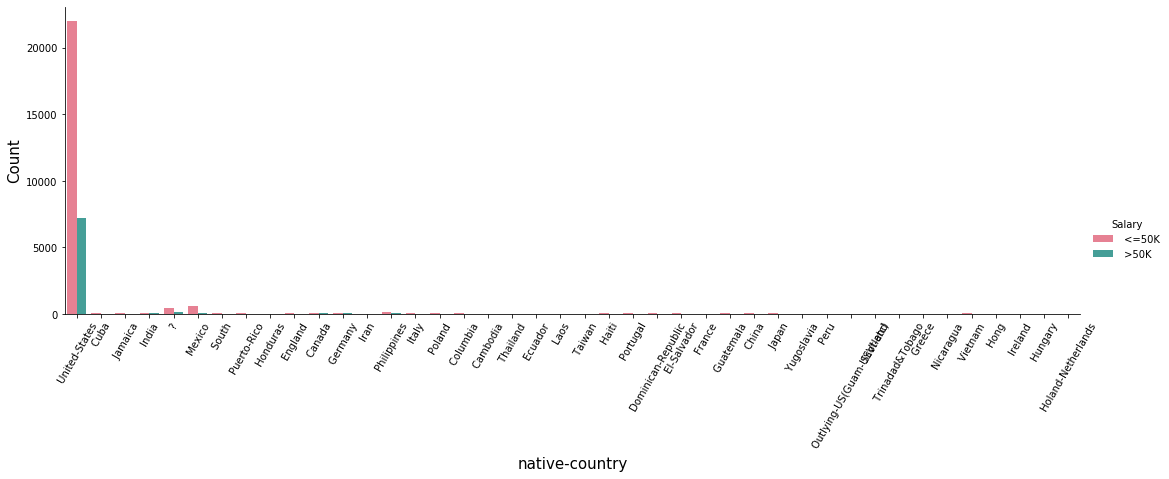

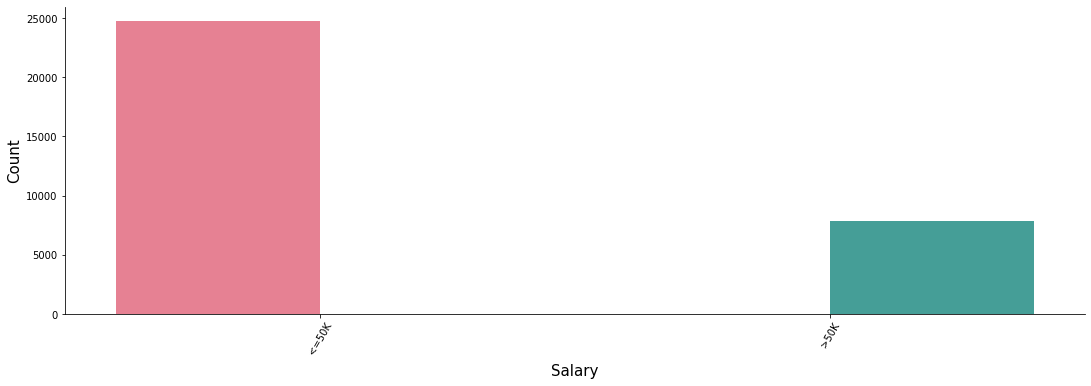

In [13]:
# For loop to Plot different graphs in a single run......  
for i in df.drop(['capital-loss','capital-gain','fnlwgt'],axis=1).columns.values:
    sns.catplot(x=i,kind='count',data=df,height=5,aspect=3,hue='Salary',palette='husl')
    plt.xticks(rotation=60,fontsize=10)
    plt.xlabel(i,fontsize=15)
    plt.ylabel('Count',fontsize=15)

## Conclusion from the graphs:                                      
                                    
1) Maximum number of persons who get salary more than 50K lies in the age range (37-47).                                
2) We can see that as age increases number of persons getting salary less than 50K increases and then it decreases ,so it means   that freshers get less salary in the starting and as they gain experience they get more salary upto a certain age after that   further increse in age leads to retirement and all that, thus reducing number of persons getting high salary.                
3) More people works in Private Sector.                                       
4) Private Sector have more number of persons where salary is less than 50K and more than 50K than the rest.                  
5) Persons who have done Bachelors, number of persons getting salary more than 50K are more. (that means more education more       salary,but completing hi)                          
6) Persons who have done Bachelors, number of persons getting salary less than 50K are more, but we can see higher education       persons do have higher chances of employement.                                    
7) Number of Persons having good marital relationship earns more money and they are more in number.                           
8) Adm-clerical occupation have more number of employment but persons who earns money more than 50K are more in Exec-Managerial   occupation and after Exec_Manegerial it is Prof-Speciality occupation where people with salary more than 50K exists.    
9) People with salary less than 50K are more in Adm-Clerical occupation and then in craft-repair occupation.     
10) Husband and Wife are equally Competitive in their respective earning category i.e (<=50K) and (>50K).        
11) As we can see that more number of persons are from united states thus in race category more number are persons who earns       money are from white race in both category i.e (<=50K) and (>50K).             
12) Where Salary is (<= 50K) Males and females are equally competitive.                      
13) Where Salary is (>50K) number of Males are more than females.            
14) More number of persons work for 40 hours a week for earnings.                      
15) More number of persons are from United States.                            
16) People who earns more than 50K money are few as compared to those who earns money less than or equal to 50K.               

In [14]:
# 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
List1=['sex','workclass','education','marital-status','occupation','relationship','race','native-country','Salary']
for i in List1:
    df[i]=le.fit_transform(df[i].astype(str))
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


In [15]:
# Checking Skewness....
df.skew()

age                0.558743
workclass         -0.752024
fnlwgt             1.446980
education         -0.934042
education-num     -0.311676
marital-status    -0.013508
occupation         0.114583
relationship       0.786818
race              -2.435386
sex               -0.719293
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
native-country    -3.658303
Salary             1.212430
dtype: float64

In [16]:
# Removing Skewness
for i in df.drop(['Salary'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [17]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(32561, 15)
(25941, 15)


age                  AxesSubplot(0.125,0.799681;0.168478x0.0803191)
workclass         AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
fnlwgt            AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
education         AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
education-num        AxesSubplot(0.125,0.703298;0.168478x0.0803191)
marital-status    AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
occupation        AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
relationship      AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
race                 AxesSubplot(0.125,0.606915;0.168478x0.0803191)
sex               AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
capital-gain      AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
capital-loss      AxesSubplot(0.731522,0.606915;0.168478x0.0803191)
hours-per-week       AxesSubplot(0.125,0.510532;0.168478x0.0803191)
native-country    AxesSubplot(0.327174,0.510532;0.168478x0.0803191)
Salary            AxesSubplot(0.529348,0.510532;

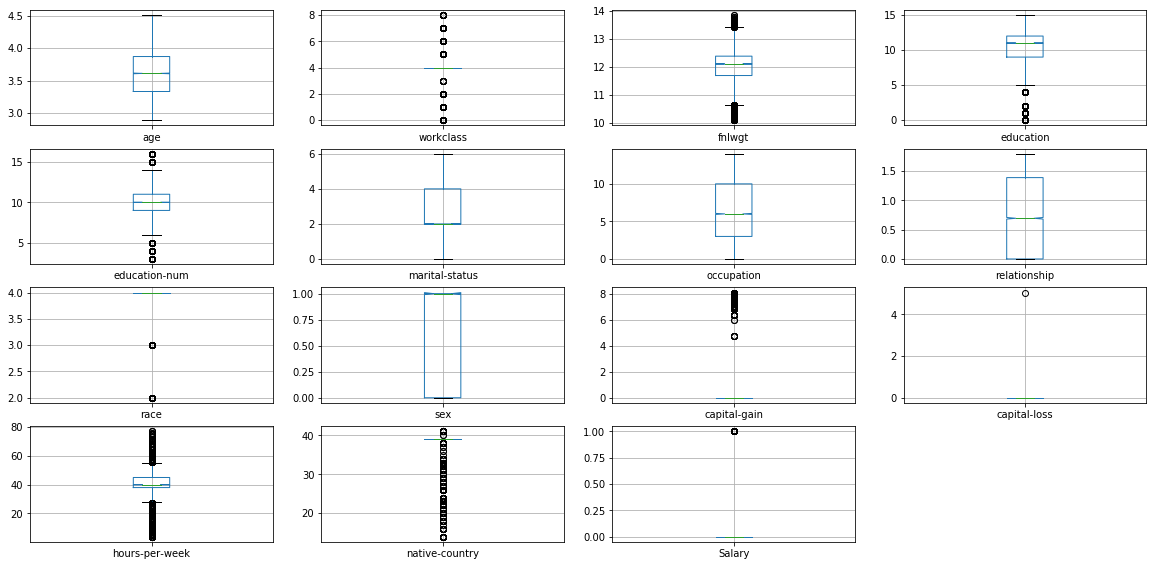

In [18]:
# Plotting the boxplot in order to check few statistical values and outliers
df_new.plot(kind='box', subplots=True, layout=(8,4),figsize=(20,20),grid=True,notch=True)

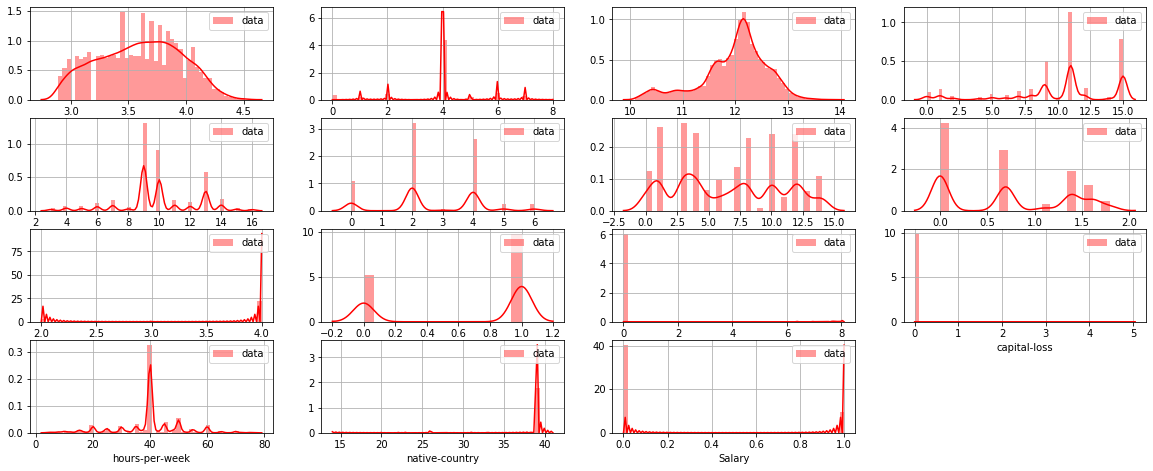

In [19]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_new.columns.values)):
    plt.subplot(8,4,i+1)
    sns.distplot(df_new[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

In [20]:
# Checking the correlation
df_new.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary
age,1,0.03,-0.061,0.014,0.064,-0.33,-0.0077,-0.35,0.01,0.093,0.043,-0.004,0.15,0.029,0.25
workclass,0.03,1,-0.02,0.021,0.05,-0.066,0.26,-0.097,0.064,0.092,-0.0043,0.00061,0.13,-0.0036,0.038
fnlwgt,-0.061,-0.02,1,-0.019,-0.038,0.025,-0.0039,0.028,-0.11,0.011,-0.01,-0.0014,-0.023,-0.097,-0.0042
education,0.014,0.021,-0.019,1,0.36,-0.036,-0.025,-0.0091,0.024,-0.035,-0.0082,-0.016,0.062,0.085,0.069
education-num,0.064,0.05,-0.038,0.36,1,-0.052,0.11,-0.087,0.079,-0.0053,-0.026,-0.01,0.15,0.14,0.3
marital-status,-0.33,-0.066,0.025,-0.036,-0.052,1,-0.0063,0.26,-0.084,-0.12,-0.0009,0.0055,-0.2,-0.033,-0.19
occupation,-0.0077,0.26,-0.0039,-0.025,0.11,-0.0063,1,-0.079,0.013,0.084,-0.012,0.00071,0.069,0.01,0.069
relationship,-0.35,-0.097,0.028,-0.0091,-0.087,0.26,-0.079,1,-0.15,-0.59,-0.01,-0.00018,-0.28,-0.019,-0.31
race,0.01,0.064,-0.11,0.024,0.079,-0.084,0.013,-0.15,1,0.12,0.0075,0.0022,0.054,0.055,0.091
sex,0.093,0.092,0.011,-0.035,-0.0053,-0.12,0.084,-0.59,0.12,1,0.0038,-0.0085,0.23,-0.0064,0.2


In [21]:
# Drooping the target value to fit the remaining data into standard scaler 
x1=df_new.drop(['Salary'],axis=1)
x1
print(x1.shape)

(25941, 14)


In [22]:
# Setting up the Target value in variable y.
y=df_new['Salary']
y.shape

(25941,)

In [23]:
# scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.256051,2.166068,-1.198720,-0.331365,1.269470,0.879332,-1.296621,-0.028547,0.352633,0.727385,6.864912,-0.006209,0.035994,0.19925
1,0.940679,1.476621,-1.081914,-0.331365,1.269470,-0.420870,-0.590771,-1.101252,0.352633,0.727385,-0.146102,-0.006209,-2.370966,0.19925
2,0.184705,0.097726,0.458939,0.177000,-0.402574,-1.721073,-0.120204,-0.028547,0.352633,0.727385,-0.146102,-0.006209,0.035994,0.19925
3,1.101753,0.097726,0.596262,-2.364825,-1.238596,-0.420870,-0.120204,-1.101252,-2.888342,0.727385,-0.146102,-0.006209,0.035994,0.19925
4,0.111506,0.097726,0.908342,0.431182,1.687481,-0.420870,-0.590771,1.671648,0.352633,-1.374787,-0.146102,-0.006209,0.035994,0.19925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25936,-1.303400,0.097726,1.047742,1.193730,0.015437,0.879332,1.056213,-0.028547,0.352633,0.727385,-0.146102,-0.006209,0.035994,0.19925
25937,-0.749066,0.097726,0.745078,-0.839730,0.851459,-0.420870,1.526780,1.671648,0.352633,-1.374787,-0.146102,-0.006209,-0.142299,0.19925
25938,0.325636,0.097726,-0.082613,0.177000,-0.402574,-0.420870,0.115079,-1.101252,0.352633,0.727385,-0.146102,-0.006209,0.035994,0.19925
25939,1.351298,0.097726,-0.108681,0.177000,-0.402574,2.179534,-1.296621,1.389490,0.352633,-1.374787,-0.146102,-0.006209,0.035994,0.19925


# Model Training

In [24]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=5)
    clf.fit(x,y)
    print(clf.best_params_)

In [25]:
#.........Grid Search for DecisionTreeClassifier......
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,'accuracy')


{'criterion': 'gini', 'max_depth': 7, 'random_state': 15}


In [26]:
#.......Grid Search for GradientBoostingClassifier......
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbc,parameters,'accuracy')


{'learning_rate': 0.1, 'n_estimators': 500}


In [27]:
#.......Grid Search for KNeighborsClassifier.......
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,25)}
grid_cv(knn,parameters,'accuracy')

{'n_neighbors': 19}


In [28]:
#.........Grid Search for SVC........
svc=SVC()
parameters={"random_state":np.arange(1,20),'gamma': [1e-3, 1e-4],}
grid_cv(svc,parameters,'accuracy')

{'gamma': 0.001, 'random_state': 1}


In [29]:
#........Grid Search for LogisticRegression....
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_cv(lr,parameters,'accuracy')

{'C': 0.01}


In [30]:
#.......Grid Search for RandomForestClassifier.....
rf=RandomForestClassifier()
parameters={'n_estimators': [200,500, 700,],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,'accuracy')

{'max_features': 'log2', 'n_estimators': 200}


In [31]:
#.....Grid Search for AdaBoostClassifier......
adc=AdaBoostClassifier()
parameters={'n_estimators': [200,500, 700,]}
grid_cv(adc,parameters,'accuracy')

{'n_estimators': 500}


In [32]:
#........Defining Instances For Differnt Models.......
KNN=KNeighborsClassifier(n_neighbors=19)
SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=0.01)
DT=DecisionTreeClassifier(criterion='gini',max_depth=7,random_state=15)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=0.1,n_estimators=500)
RF=RandomForestClassifier(max_features= 'log2', n_estimators= 200,)
AD=AdaBoostClassifier(n_estimators=500,)
XG=XGBClassifier()

In [33]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(('XGBClassifier',XG))

In [34]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  53 is: 0.854114472923492


Learning Score :  0.857555898226677
Accuracy Score :  0.854114472923492
Cross Val Score :  0.8463437201511852
roc auc score :  0.723342572184953


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4201
           1       0.65      0.51      0.57       988

    accuracy                           0.85      5189
   macro avg       0.77      0.72      0.74      5189
weighted avg       0.84      0.85      0.85      5189



Confusion Matrix:
 [[3926  275]
 [ 482  506]]





*************************** SVC *****************************


SVC(C=1.0, cache_size=200, class_weig

Max Accuracy Score corresponding to Random State  72 is: 0.8627866640971286


Learning Score :  0.9134541249036238
Accuracy Score :  0.8627866640971286
Cross Val Score :  0.8576004825018602
roc auc score :  0.7352783509228091


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      4201
           1       0.68      0.53      0.59       988

    accuracy                           0.86      5189
   macro avg       0.79      0.74      0.76      5189
weighted avg       0.85      0.86      0.86      5189



Confusion Matrix:
 [[3954  247]
 [ 465  523]]







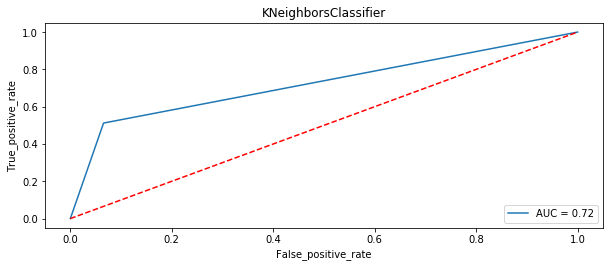

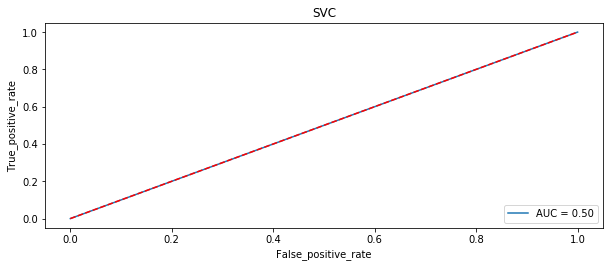

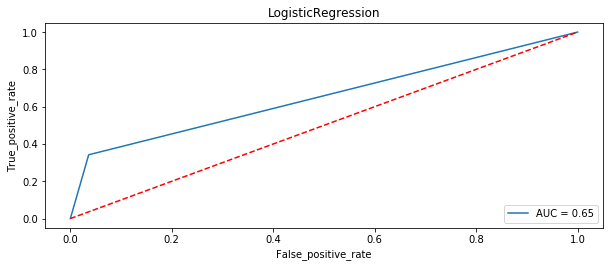

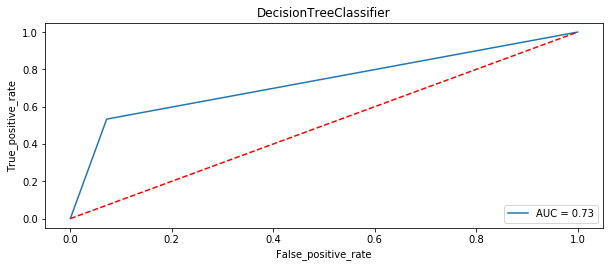

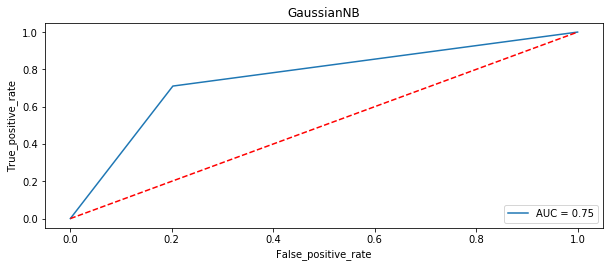

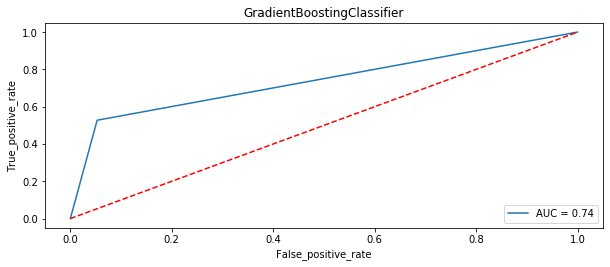

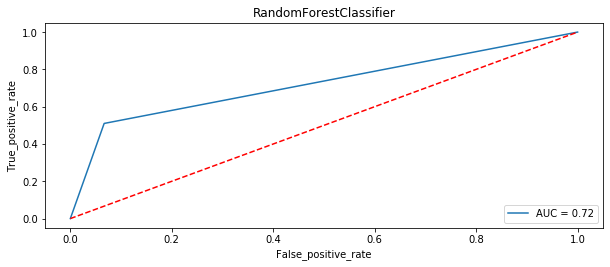

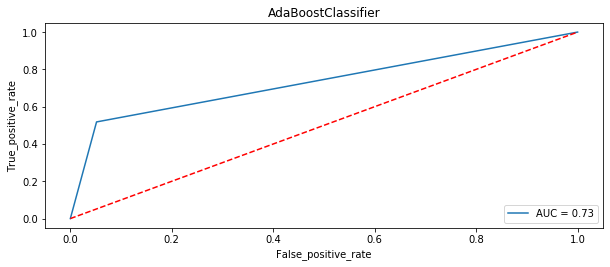

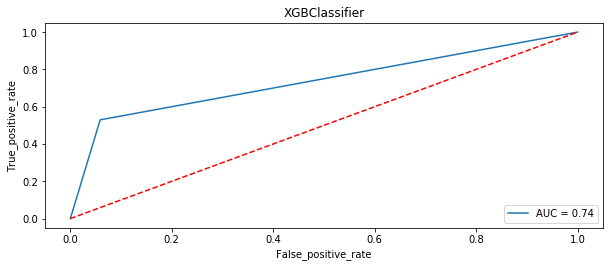

In [35]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [36]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,'Roc_Auc_curve':rocscore})   #'Roc_Auc_curve':rocscore
result

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,KNeighborsClassifier,85.755590,85.411447,84.634372,72.334257
1,SVC,80.970509,80.959722,80.968354,50.000000
2,LogisticRegression,83.558211,84.544228,83.755468,65.296170
3,DecisionTreeClassifier,85.649576,85.315090,84.777053,73.087560
4,GaussianNB,77.790093,78.126807,38.876916,75.421579
5,GradientBoostingClassifier,88.015613,86.721912,86.037606,73.724169
6,RandomForestClassifier,99.995181,85.276547,84.946716,72.173533
7,AdaBoostClassifier,86.333847,86.644826,85.852626,73.328213
8,XGBClassifier,91.345412,86.278666,85.760048,73.527835


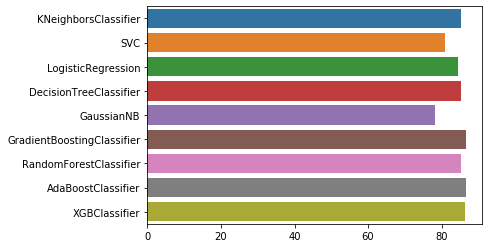

In [37]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)

## After all this process conclusion is that GradientBoostingClassifier is performing well.

In [38]:
# Using GradientBoostingClassifier for final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=.20,stratify=y)
gbr=GradientBoostingClassifier(learning_rate=0.1,n_estimators=500)
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
gbrpred=gbr.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,gbrpred))
print('Confusion Matrix:',confusion_matrix(y_test,gbrpred))
print('Classification Report:',classification_report(y_test,gbrpred))

Accuracy Score: 0.8604740797841588
Confusion Matrix: [[3956  245]
 [ 479  509]]
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.94      0.92      4201
           1       0.68      0.52      0.58       988

    accuracy                           0.86      5189
   macro avg       0.78      0.73      0.75      5189
weighted avg       0.85      0.86      0.85      5189



(2.0, 0.0)

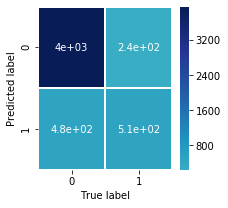

In [39]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, gbrpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [40]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=gbrpred
test
# On the lest side values are those which are taken by machine for test...

,Salary,Predicted values
8524,1,1
32477,0,0
6961,0,0
17913,0,0
30337,1,0
...,...,...
21832,0,0
27815,0,0
21445,0,0
636,0,0


In [41]:
# Saving the Predicted values in csv file
test.to_csv('Project_11_Census_Income.csv') 

In [42]:
# Dumping Data in pickle file.
from sklearn.externals import joblib
joblib.dump(gbr,'Project_11_Census_Income.pkl')

['Project_11_Census_Income.pkl']

## Conclusion:                                                                               
                                  
1) Maximum number of persons who get salary more than 50K lies in the age range (37-47).                        
2) We can see that as age increases number of persons getting salary less than 50K increases and then it decreases ,so it means   that freshers get less salary in the starting and as they gain experience they get more salary upto a certain age after that   further increse in age leads to retirement and all that, thus reducing number of persons getting high salary.         
3) More people works in Private Sector.                         
4) Private Sector have more number of persons where salary is less than 50K and more than 50K than the rest.              
5) Persons who have done Bachelors, number of persons getting salary more than 50K are more. (that means more education more       salary,but completing hi)                        
6) Persons who have done Bachelors, number of persons getting salary less than 50K are more, but we can see higher education       persons do have higher chances of employement.                                   
7) Number of Persons having good marital relationship earns more money and they are more in number.                  
8) Adm-clerical occupation have more number of employment but persons who earns money more than 50K are more in Exec-Managerial   occupation and after Exec_Manegerial it is Prof-Speciality occupation where people with salary more than 50K exists.     
9) People with salary less than 50K are more in Adm-Clerical occupation and then in craft-repair occupation.       
10) Husband and Wife are equally Competitive in their respective earning category i.e (<=50K) and (>50K).       
11) As we can see that more number of persons are from united states thus in race category more number are persons who earns       money are from white race in both category i.e (<=50K) and (>50K).               
12) Where Salary is (<= 50K) Males and females are equally competitive.                        
13) Where Salary is (>50K) number of Males are more than females.                       
14) More number of persons work for 40 hours a week for earnings.                   
15) More number of persons are from United States.                             
16) People who earns more than 50K money are few as compared to those who earns money less than or equal to 50K.              

## Steps Followed:                  

1) Data Analysis.                      
2) EDA Analysis.                            
3) Best parameters are found using Gridsearch cv and applied to models.                                   
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.               
5) AUC ROC Curves are made for each model.                
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.                         
7) GradientBoostingClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.   
8) Predicted values are saved in Project_11_Census_Income.csv file.                                       
9) Pickle file is named with Project_11_Census_Income.pkl                    